In [14]:
import scipy.io
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import math

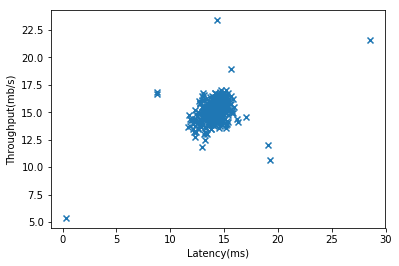

[[1.8326314134945172, 1.7097453308287784]]
[14.1122257839456, 14.99771050813621]


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [15]:
mat = scipy.io.loadmat('F:\Machine learning\Programming assgnmnt\machine-learning-ex8\ex8\ex8data1.mat')
mu = [0]*2
s=0
sigma2 = [0]*2
X = mat['X']
Xval = mat['Xval']
yval = mat['yval'] 
#visualize data
plt.scatter(Xval[:, 0], Xval[:, 1], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.show()
# determine mu and sigma
for i in range(mat['X'][1,:].size):
    mu[i] = sum(mat['X'][:,i])/mat['X'][:,i].size
for i in range(len(mu)):
    s=0
    for j in range(mat['X'][:,i].size):
        s+= (mat['X'][j,i]-mu[i])**2
    sigma2[i] = s/mat['X'][:,i].size
sigma2 = [sigma2]
print(sigma2)
print(mu)
yval

In [24]:
# multivariate gaussian/normal distribution
X = X - mu
sigma2 = np.cov(X.T)
from scipy.stats import multivariate_normal
X = X+mu
y = multivariate_normal.pdf(X, mean=mu, cov=sigma2)
y.shape

(307L,)

In [17]:
pval = multivariate_normal.pdf(Xval, mean=mu, cov=sigma2)
y.shape


(307L,)

In [18]:
    # figuring out threshold value 
    from __future__ import division
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    pval
    stepsize = (np.max(pval) - np.min(pval))/1000
    epsvec = np.arange(np.min(pval), np.max(pval), stepsize)
    for i in range(len(epsvec)):
        predict = pval<epsvec[i]
        #print(predict)
        count =0
        for l in range(len(predict)):
            if predict[l]==1:
               count+=1
        #print(count)
        TP, FP, FN = 0,0,0
        prec, rec = 0,0
        try:
            for j in range(np.size(pval,0)):
                if predict[j] == 1 and yval[j]==1:
                   TP+=1
                elif predict[j] == 1 and yval[j]==0:
                   FP+=1
                elif predict[j] == 0 and yval[j]==1:
                   FN+=1
            #print(TP,FP,FN)
            prec = TP/(TP+FP)
            rec = TP / (TP+FN)
            #print(prec,' ',rec)
            F1 = (2*prec*rec)/(prec+rec)
            #print(F1)       ####### F1 keno 0 astese???? !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            if F1 > bestF1:
               bestF1 = F1
               bestEpsilon = epsvec[i]
               #print("iii")
        except ZeroDivisionError:
            print('Warning dividing by zero!!') 
      

Warning dividing by zero!!
iii


In [19]:
bestEpsilon

9.036240676156386e-05

In [33]:
#anomaly detection
an = y < bestEpsilon
l = [] #index of anomaly
for i in range(len(an)):
    if(an[i]== True):
      l.append(i)  

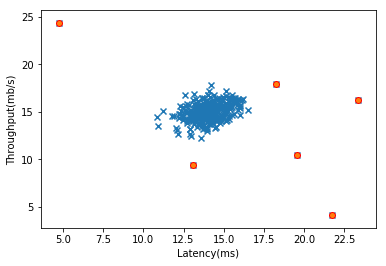

In [31]:
plt.scatter(X[:, 0], X[:, 1], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.scatter(X[l,0], X[l, 1], edgecolors = 'r')
plt.show()

305